# What values do self-identifying conservatives and liberals differ on most?

Data Science Project 1, Siddharth Garimella

In a US Government class I took in high school, one of the first concepts my professor tried to teach the class was the faultiness/inaccuracy of the distinction between a "liberal" and a "conservative". These terms are often used loosely, and tend to be associated with slightly different sets of values and ideals for different people. For the purposes of media, the two groups have been pit against each other as if the ideals/values of each group are in complete opposition to each other, and it is likely this process has created broader misconceptions pertaining to each group. 

I want to use the data science techniques taught thus far to attempt to gain a better understanding of how much specific values/views contribute to people's political identifications on the "liberal"-"conservative" spectrum.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Hist, Pmf, Cdf

import bokeh
import thinkstats2
import thinkplot

import utils
from utils import decorate

### Loading data

Data from the General Social Survey is loaded for use. Relevant columns hypothesized to relate to the political views of individuals surveyed are also identified.

In [2]:
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.columns.values

array(['year', 'id_', 'agewed', 'divorce', 'sibs', 'childs', 'age',
       'educ', 'paeduc', 'maeduc', 'speduc', 'degree', 'padeg', 'madeg',
       'spdeg', 'sex', 'race', 'res16', 'reg16', 'srcbelt', 'partyid',
       'pres04', 'pres08', 'pres12', 'polviews', 'natspac', 'natenvir',
       'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace',
       'natarms', 'nataid', 'natfare', 'spkath', 'colath', 'libath',
       'spkhomo', 'colhomo', 'libhomo', 'cappun', 'gunlaw', 'grass',
       'relig', 'fund', 'attend', 'reliten', 'postlife', 'pray',
       'relig16', 'fund16', 'sprel16', 'prayer', 'bible', 'racmar',
       'racpres', 'affrmact', 'happy', 'hapmar', 'health', 'life',
       'helpful', 'fair', 'trust', 'conclerg', 'coneduc', 'confed',
       'conpress', 'conjudge', 'conlegis', 'conarmy', 'satjob', 'class_',
       'satfin', 'finrela', 'union_', 'fepol', 'abany', 'chldidel',
       'sexeduc', 'premarsx', 'xmarsex', 'homosex', 'spanking', 'fear',
       'owngun', 'pist

In [3]:
polviews = gss['polviews']
fair = gss['fair']
trust = gss['trust']
happy = gss['happy']

There are definitely more categorical variables I can try out than the one's pulled out of the dataset above, but I will start with these.

This also explicitly defines my hypothesis (for now)- Do individuals' that identify as more liberal or more conservative tend to have similar opinions on how happy they are, or how trustworthy or fair other people are? 

### Interpreting data

I reference the GSS codebook for values that are non-responses, and replace them so that they don't interfere with the results.

In [4]:
polviews.replace([8,9,0], np.nan, inplace=True)
happy.replace([8,9,0], np.nan, inplace=True)
fair.replace([3,8,9,0], np.nan, inplace=True)
trust.replace([3,8,9,0], np.nan, inplace=True)

Since I'm dealing with categorical variables across the board, I read the exact question asked to the people surveyed, and tried to summarize what different values in the responses meant as accurately as possible. I use the describe method to gain basic stats about each column to make sure all the special codes are out, and my data appears reasonable/as expected.

In [5]:
polviews.describe()
# Respondents that consider themselves more liberal have lower values, with Extremely liberal having a value of 1
# Respondents that consider themselves more conservative have higher values, with Extremely conservative having a value of 7

count    53111.000000
mean         4.114703
std          1.370543
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: polviews, dtype: float64

In [6]:
fair.describe()
# Respondents that believe others attempt to take advantage of them when given the chance have values of 1
# Respondents that believe others would try to be fair in the former situation have values of 2

count    36843.000000
mean         1.595337
std          0.490833
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: fair, dtype: float64

In [7]:
trust.describe()
# Respondents that believe most people can be trusted have values of 1
# Respondents that believe 'you can't be too careful in dealing with people' have values of 2

count    37941.000000
mean         1.607786
std          0.488250
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: trust, dtype: float64

In [8]:
happy.describe()
# Respondents that believe they are very happy have a value of 1
# Respondents that believe they are pretty happy have a value of 2
# Respondents that beleive they are not too happy have a value of 3

count    57724.000000
mean         1.788234
std          0.631553
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: happy, dtype: float64

### Understanding how the data are distributed

The descriptions from earlier seem reasonable, so now I want to get a better understanding of how each column's data is distributed. 

In [9]:
def make_plot(type_plot, data, name):
    if type_plot == 'cdf':
        cdf = Cdf(data)
        thinkplot.cdf(cdf)
        decorate(xlabel=name, 
             ylabel='Probability')
        return cdf
    elif type_plot == 'pmf':
        pmf = Pmf(data)
        thinkplot.pmf(pmf)
        decorate(xlabel=name, 
             ylabel='Probability')
        return pmf
    elif type_plot == 'hist':
        hist = Hist(data)
        thinkplot.hist(hist)
        decorate(xlabel=name, 
             ylabel='Count')
        return hist

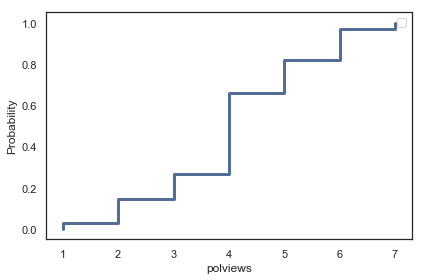

In [10]:
make_plot('cdf',polviews,'polviews');

The CDF looks fairly linear. There are slightly more individuals reporting conservative than liberal, but the CDF looks fairly linear. Since there are only seven categories, this visual isn't super helpful. The other variables have only 2-3 unique values after special codes are dropped, so we don't really need visuals for some of them.

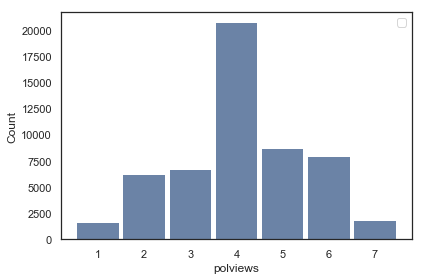

In [11]:
make_plot('hist',polviews,'polviews');

Interestingly, there are more people that identify as moderate either all that identify as liberal or all that identify as conservative. One result of hearing so much discussion about "the liberal agenda" or "the conservative agenda" may be thinking everyone can fall into one of the two buckets, but this is not true.

In [12]:
trust.mean()

1.6077857726470046

A mean of 1.6 suggests that there are slightly more people that responded who agreed that you can't be too careful when dealing with others.

In [13]:
fair.mean()

1.595336970387862

A mean of 1.595 suggests that there are slightly more people that responded who agreed that people can be fair and will tend not to take advantage of you when given the chance.

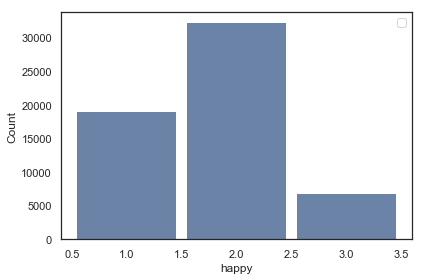

In [14]:
make_plot('hist',happy,'happy');

There are a lot of people who identify as "pretty happy", with fewer people identifying at extremes as either not happy or very happy.

### Searching for associations

The hypothesis asks if there exists a relationship between political identification/view and any one of the "happy","trust", or "fair" variables, among individuals that are **more conservative or more liberal**. There is an emphasis on the last part as I am more interested in the defining qualities of the two groups.

This means we need to make thresholds for a "conservative bin" and a "liberal bin". I will do this by disregarding the "moderate" value of 4, and considering values between 1-3 for polview column as liberal and values between 5-7 as conservative.

In [15]:
#make_plot('hist',trust[polviews < 4],"trust among liberals");
#make_plot('hist',trust[polviews > 4],"trust among conservatives");
#make_plot('hist',fair[polviews > 4],"belief in fairness among conservatives");
#make_plot('hist',fair[polviews < 4],"belief in fairness among liberals");
#make_plot('hist',happy[polviews < 4],"Happiness among liberals");
#make_plot('hist',happy[polviews > 4],"Happiness among conservatives");

# ...this approach is bad.

In [16]:
gss['polviews'].replace([8,9,0], np.nan, inplace=True)
gss['happy'].replace([8,9,0], np.nan, inplace=True)
gss['fair'].replace([3,8,9,0], np.nan, inplace=True)
gss['trust'].replace([3,8,9,0], np.nan, inplace=True)

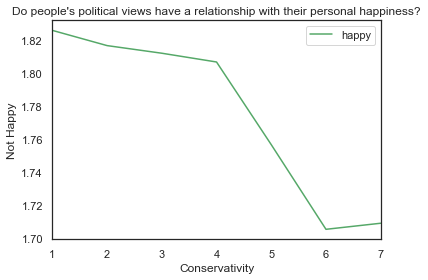

In [17]:
grouped = gss.groupby('polviews')
series = grouped['happy'].mean() 
series.plot(color='C2')
decorate(xlabel='Conservativity', 
         ylabel='Not Happy',
         title='Do people\'s political views have a relationship with their personal happiness?')

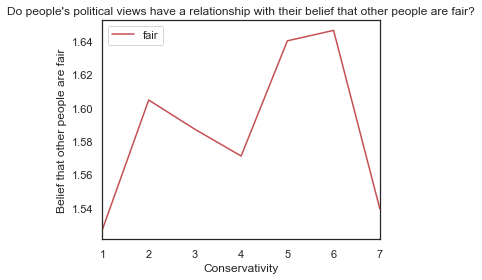

In [18]:
series = grouped['fair'].mean() 
series.plot(color='C3')
decorate(xlabel='Conservativity', 
         ylabel='Belief that other people are fair',
         title='Do people\'s political views have a relationship with their belief that other people are fair?')

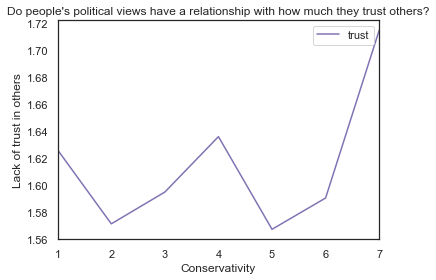

In [19]:
series = grouped['trust'].mean() 
series.plot(color='C4')
decorate(xlabel='Conservativity', 
         ylabel='Lack of trust in others',
         title='Do people\'s political views have a relationship with how much they trust others?')

### Searching for meaningful associations

The graphs from above suggest that there's no clear linear trend between Conservativity and people's trust in others, or people's belief that others or fair. However, there is an interesting potential trend between how Conservative an individual is, and how happy they think they are. From the first graph, the trend appears to be negative, suggesting people who are more Conservative consider themselves happier. I'm going to explore the happiness trend further.



##### Finding the effect size...

In [20]:
# The only category that is neither liberal nor conservative is 4, which is for moderates. 
# So < 4 is liberals and > 4 is conservatives.

lib = gss['happy'][gss['polviews'] < 4]
cons = gss['happy'][gss['polviews'] > 4]

In [21]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [22]:
CohenEffectSize(lib,cons)

0.13597629733067976

While this does not seem like a huge effect size, it is describing the difference in means between 1 and 2, so it still could be somewhat important.

To find out how likely it is that this effect may be due to chance, I'll run a null hypothesis test, where my null hypothesis is that there is no difference between how happy liberals and conservatives are.

##### Calculating a p-value...

In [23]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / float(iters)

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        plt.hist(self.test_stats, color='C4', alpha=0.5)
        plt.axvline(self.actual, linewidth=3, color='0.8')
        plt.xlabel('test statistic')
        plt.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()


In [24]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = float(abs(group1.mean() - group2.mean()))
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [25]:
np.warnings.filterwarnings('ignore')
data = (lib.dropna(), cons.dropna())
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute happiness')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute happiness
p-value = 0.0
actual = 0.0851136615295065
ts max = 0.026679593125425338


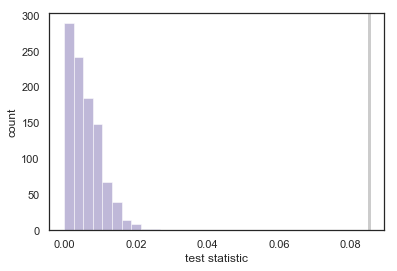

In [26]:
ht.PlotHist()

The p-value is insanely small. This means that it is practically impossible the effect can be explained by chance.

### Describing trends

With an effect size of 0.136 and a tiny p-value, we know that there exists some substantive difference in the happiness of liberals and the happiness of conservatives, and that this difference is almost without a doubt not due to random sampling.

Because all the variables are categorical, it doesn't make a ton of sense to run a regression, unless we add a lot of jitter points. Still, it would probably be inaccurate to generate data points like this, as we would be inadvertently adding new categories to the dataset, which could start misrepresenting the original data.

Now, I can either decide to present that identifying conservatives are happier on average than identifying liberals, or I can use the process above to explore all the trends in the GSS data available to me. Because I set out on this project to understand a couple key differences between the "liberal" and "conservative" through data (not just happiness), I'll try the latter. I'm also curious to find out.

I've been really thinking about how I would look through all the columns, and came up with this algorithm. The following code does not yield accurate results, as I have not removed any of the special codewords from the columns I'm searching through. That said, it would be a lot of work to do this for all the columns in the GSS dataset. So, I'll run basic tests for the maximum effect sizes first, and eliminate the codewords after I've gathered some columns of interest.

In [27]:
import operator
corr_feat_list = gss.columns.values

flces = dict();
for feature in corr_feat_list:
    lib = gss[feature][gss['polviews'] < 4]
    cons = gss[feature][gss['polviews'] > 4]
    flces[feature] = abs(CohenEffectSize(lib,cons))

# As to be expected, polviews and partyid have the highest two effect sizes so I'm excluding them
top_feats_effects = sorted(flces.items(), key=operator.itemgetter(1), reverse=True)[2:7]
top_feats_effects

[('attend', 0.4249594645355409),
 ('divorce', 0.33082123756662113),
 ('homosex', 0.31358386147278766),
 ('speduc', 0.2972324997643022),
 ('age', 0.2931815300818629)]

In [28]:
top_feats_p = []
top_feats = [feat[0] for feat in top_feats_effects]

for feat in top_feats:
    lib = gss[feat][gss['polviews'] < 4]
    cons = gss[feat][gss['polviews'] > 4]
    data = (lib.dropna(), cons.dropna())
    top_feats_p.append((feat, DiffMeansPermute(data).PValue(iters=1000)))

top_feats_p

[('attend', 0.0),
 ('divorce', 0.0),
 ('homosex', 0.0),
 ('speduc', 0.0),
 ('age', 0.0)]

Interesting results... but what do they mean? The above two cells have found the effect sizes and p-values for every column in the dataset segment, and display the relevant information for the top 5 non party-based variables. There're a couple problems here, like how the codewords still remain in the data. Furthermore, we have no clue what these variables mean. I'll approach them one at a time, starting with figuring out what the variables here represent.

Checking the GSS Variable explorer yields the following-

**'attend'**: How often do you attend religious services? Higher values mean you attend more often, and 9 is N/A.

**'divorce'**: Ever been divorced or separated? 1 is yes, and 2 is no. 0, 8 and 9 are codewords.

**'homosex'**: Do you believe sexual relations between members of the same sex is wrong? 1 is always wrong, and they get "less wrong" up to 4, which is for a belief that it is not wrong. 0, 5, 8, and 9 are codewords.

**'speduc'**: Highest year of school completed. 97, 98, and 99 are codewords.

**'age'**: Respondent's age. 98 and 99 are codewords.


In [29]:
# replacing codewords and rerunning tests
gss['attend'].replace([9], np.nan, inplace=True)
gss['divorce'].replace([8,9,0], np.nan, inplace=True)
gss['homosex'].replace([8,9,0,5], np.nan, inplace=True)
gss['speduc'].replace([97,98,99], np.nan, inplace=True)
gss['age'].replace([98,99], np.nan, inplace=True)

effs = dict()

for feature in top_feats:
    lib = gss[feature][gss['polviews'] < 4]
    cons = gss[feature][gss['polviews'] > 4]
    effs[feature] = abs(CohenEffectSize(lib,cons))

# As to be expected, polviews and partyid have the highest two effect sizes so I'm excluding them
sorted(effs.items(), key=operator.itemgetter(1), reverse=True)

[('homosex', 0.6669385219950538),
 ('attend', 0.43591838861878074),
 ('age', 0.2931815300818629),
 ('speduc', 0.036946393825288915),
 ('divorce', 0.03520390052000185)]

Looks like the former data with the codewords in it did was in fact quite faulty! None the less, 'homosex', 'attend', and 'age' still have large effect sizes. I'm going to ignore 'speduc' and 'divorce' now. The codewords threw off our effect size by a lot, suggesting a lot of respondents were codewords. I'll repeat the hypothesis test to be safe...

In [30]:
corrected_top_feats_p = []

for feat in top_feats:
    lib = gss[feat][gss['polviews'] < 4]
    cons = gss[feat][gss['polviews'] > 4]
    data = (lib.dropna(), cons.dropna())
    corrected_top_feats_p.append((feat, DiffMeansPermute(data).PValue(iters=1000)))

corrected_top_feats_p

[('attend', 0.0),
 ('divorce', 0.01),
 ('homosex', 0.0),
 ('speduc', 0.009),
 ('age', 0.0)]

So removing the codewords really changed my values, but some of the columns I identified earlier do in fact have a high effect size, not due to random sampling. 

### Creating Visualizations

I just found some interesting properties that liberals and conservatives differ on. For validation and presentation, I need to generate some descriptive visuals, so I'll do so for the top three variables that precipitated out of my original (with codewords in) guess.

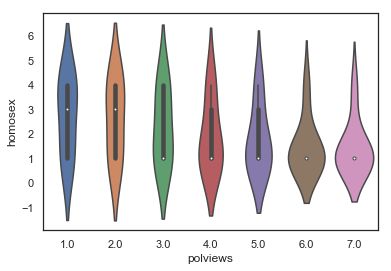

In [31]:
sns.violinplot(y=gss['homosex'], x=gss['polviews'], bw=0.9, orient="v")

The value of homosex decreases rapidly as conservativity increases. This suggests conservatives are less tolerant of same-sex relationships.

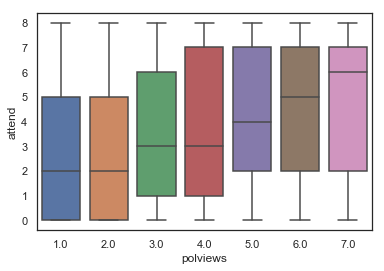

In [32]:
sns.boxplot(y=gss['attend'], x= gss['polviews'], orient="v")

The median value of attend strictly increases as conservativity increases. This suggests conservatives attend religious events far more often than liberals.

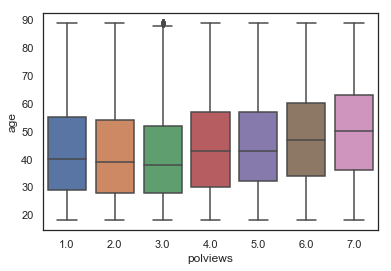

In [33]:
sns.boxplot(y=gss['age'], x= gss['polviews'])

There is a slight increase in age as conservativity goes up.

The box/violin plots above clearly reveal certain trends in opinion on homosexual relationships, attendance at religious events, and age with conservativity. 

**The more conservative an individual identifies themselves as, the more likely they are to disagree with the idea of sexual relations between members of the same sex.**

**The more conservative an individual identifies themselves as, the more likely they attend religious events on a frequent basis.**

**Individuals who identify themselves as conservative tend to be older on average than individuals that identify themselves as liberal.**

### Fine tuning

Labels like 'polviews' and 'attend' aren't meaningful outside this notebook. For a report, I want graphs that make sense to readers who may not have read my notebook. I'll try and make better visuals here...

In [34]:
# The tiers made logarithmic behavior look linear, so I made a calibration curve with 5 of the tiers and transformed the tier data into days attended in a year
gss['attend_mod'] = 54068860 + (2.361046 - 54068860)/(1 + (gss['attend']/114.2279)**(4.723202) )
gss['attend_mod_j'] = gss['attend_mod'] + np.random.random()
gss['attend_mod_j']

0          4.751797
1          4.751797
2          2.901619
3        104.115808
4        104.115808
5          2.911939
6        104.115808
7        104.115808
8         23.557790
9          4.751797
10        10.101484
11        51.771200
12         3.174203
13         4.751797
14       104.115808
15        10.101484
16        23.557790
17         2.911939
18        23.557790
19         3.174203
20         2.901619
21         2.901619
22       104.115808
23         2.911939
24       104.115808
25       104.115808
26        10.101484
27       104.115808
28        51.771200
29        23.557790
            ...    
62436    193.074403
62437      2.901619
62438      2.901619
62439      2.901619
62440      2.901619
62441      3.174203
62442    104.115808
62443     51.771200
62444      3.174203
62445      4.751797
62446      3.174203
62447      2.901619
62448      2.901619
62449      4.751797
62450      2.901619
62451      2.901619
62452      4.751797
62453    193.074403
62454      2.901619


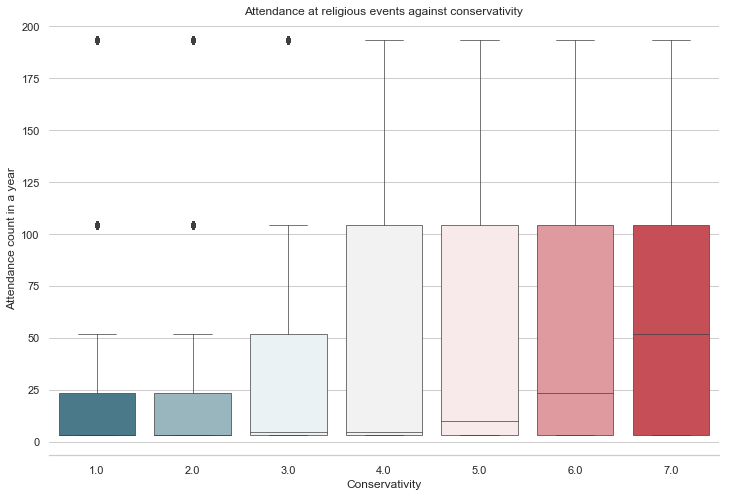

In [35]:
sns.set_style("whitegrid")
fig = sns.boxplot(y=gss['attend_mod_j'], x= gss['polviews'], linewidth=0.7, orient="v", palette=sns.diverging_palette(220, 10, sep=80, n=7))
fig.set_title("Attendance at religious events against conservativity")
fig.set(xlabel='Conservativity', ylabel='Attendance count in a year')
fig.get_figure().set_size_inches(12, 8)
sns.despine(left=True)
fig.get_figure().savefig("figures/attend.jpg")

In [36]:
gss['polviews_mod'] = gss['polviews'][gss['polviews'] != 4]
gss['polviews_binned'] = pd.cut(x=gss['polviews_mod'], bins=2, labels=['Liberals','Conservatives'])

diff = len(gss['polviews_binned'][gss['polviews_binned'] == 'Conservatives']) - len(gss['polviews_binned'][gss['polviews_binned'] == 'Liberals'])
len(gss['polviews_binned'][gss['polviews_binned'] == 'Conservatives']) 

18221

In [37]:
gss.drop(gss['polviews_binned'][gss['polviews_binned'] == 'Conservatives'].index[0:diff], inplace=True)
len(gss['polviews_binned'][gss['polviews_binned'] == 'Conservatives']) 

14247

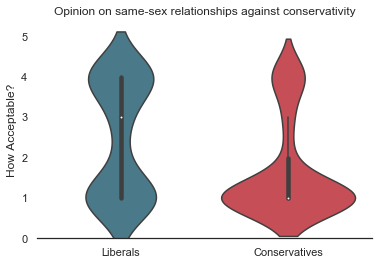

In [38]:
sns.set_style("white")
gig = sns.violinplot(y=gss['homosex'], x=gss['polviews_binned'], bw=0.4, orient="v", palette=sns.diverging_palette(220, 10, sep=80, n=2))
gig.set_title("Opinion on same-sex relationships against conservativity")
gig.set(xlabel='', ylabel='How Acceptable?', ylim=(0,None))

sns.despine(left=True)

In [39]:
nl = len(gss['homosex'][gss['polviews_binned'] == 'Liberals'])
nc = len(gss['homosex'][gss['polviews_binned'] == 'Conservatives'])
nt = nl + nc
perc_lib_against = gss['homosex'][gss['polviews_binned'] == 'Liberals'].value_counts()[1.0]/nl
perc_cons_against = gss['homosex'][gss['polviews_binned'] == 'Conservatives'].value_counts()[1.0]/nc

print("Percentage of Liberals that believe same-sex relations are always wrong: ", perc_lib_against)
print("Percentage of Conservatives that believe same-sex relations are always wrong: ", perc_cons_against)

Percentage of Liberals that believe same-sex relations are always wrong:  0.28834140520811397
Percentage of Conservatives that believe same-sex relations are always wrong:  0.454341264827683


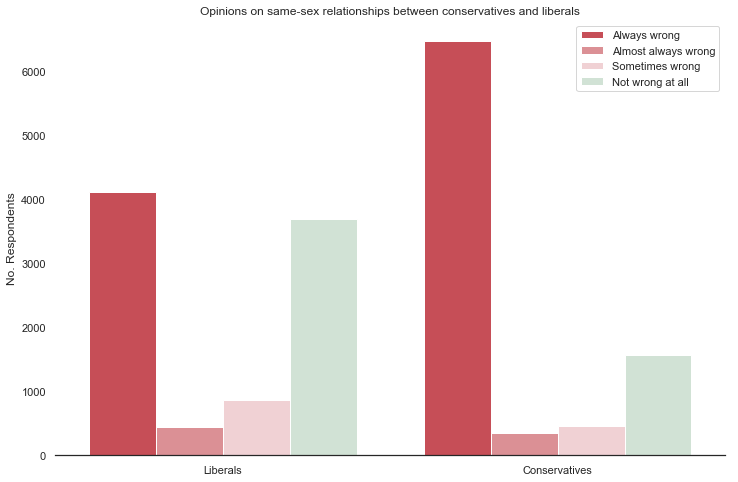

In [40]:
sns.set_style("white")
gig = sns.countplot(x='polviews_binned', hue='homosex', data=gss, orient="v", palette=sns.diverging_palette(10, 133, sep=8, n=6))
gig.set_title("Opinions on same-sex relationships between conservatives and liberals")
gig.set(xlabel='', ylabel='No. Respondents', ylim=(0,None))
gig.legend(['Always wrong', 'Almost always wrong', 'Sometimes wrong', 'Not wrong at all']);
sns.despine(left=True)
gig.get_figure().set_size_inches(12, 8)
gig.get_figure().savefig("figures/homosex.jpg")

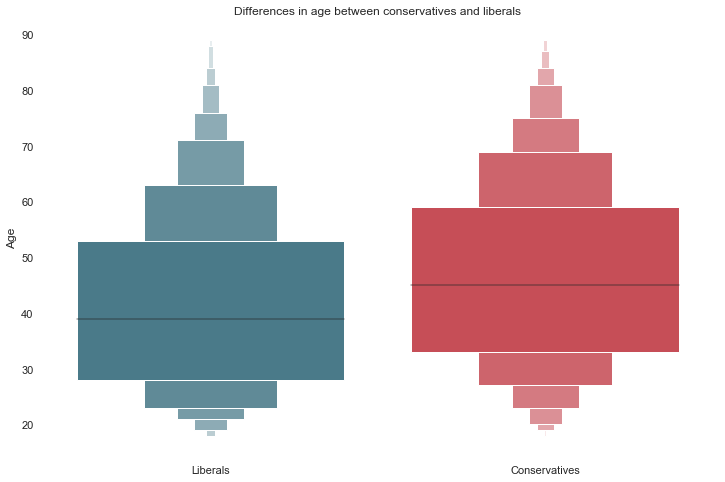

In [41]:
sig = sns.boxenplot(x="polviews_binned", y="age", data=gss, palette=sns.diverging_palette(220, 10, sep=80, n=2));
sig.set_title("Differences in age between conservatives and liberals")
sig.set(xlabel='', ylabel='Age')
sns.despine(left=True, bottom=True)
sig.get_figure().set_size_inches(12, 8)
sig.get_figure().savefig("figures/age.jpg")

In [42]:
# Numbers for report
np.mean(gss['age'][gss['polviews_binned'] == 'Liberals'])

41.80745953553836

In [43]:
np.mean(gss['age'][gss['polviews_binned'] == 'Conservatives'])

46.900021092596496

In [44]:
libage = Cdf(gss['age'][gss['polviews_binned'] == 'Liberals'])
consage = Cdf(gss['age'][gss['polviews_binned'] == 'Conservatives'])

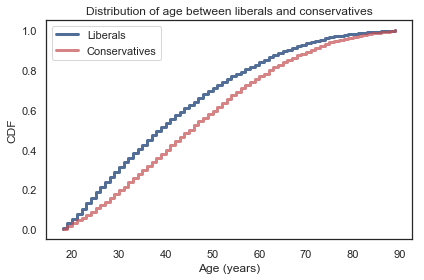

In [45]:
thinkplot.Cdf(libage, label="Liberals")
plt = thinkplot.Cdf(consage, label="Conservatives", color='r')
decorate(title='Distribution of age between liberals and conservatives', 
         xlabel='Age (years)', 
         ylabel='CDF')